In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import backend as K

In [3]:
tf.__version__

'2.0.0'

In [6]:
inputs_0 = layers.Input(shape=(4,))
x = layers.Dense(128, activation='relu')(inputs_0)
x = layers.Dense(2, activation=None)(x)

model_0 = models.Model(inputs=inputs_0, outputs=x)
model_0.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               640       
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 258       
Total params: 898
Trainable params: 898
Non-trainable params: 0
_________________________________________________________________


In [7]:
inputs_1 = layers.Input(shape=(4,))
inputs_2 = layers.Input(shape=(4,))
x = layers.concatenate([
    model_0(inputs_1), model_0(inputs_2)])
value_out = layers.Dense(1, activation=None)(x)

model = models.Model(inputs=[inputs_1, inputs_2], outputs=[x, value_out])
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 4)]          0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 4)]          0                                            
__________________________________________________________________________________________________
model_2 (Model)                 (None, 2)            898         input_5[0][0]                    
                                                                 input_6[0][0]                    
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 4)            0           model_2[1][0]              

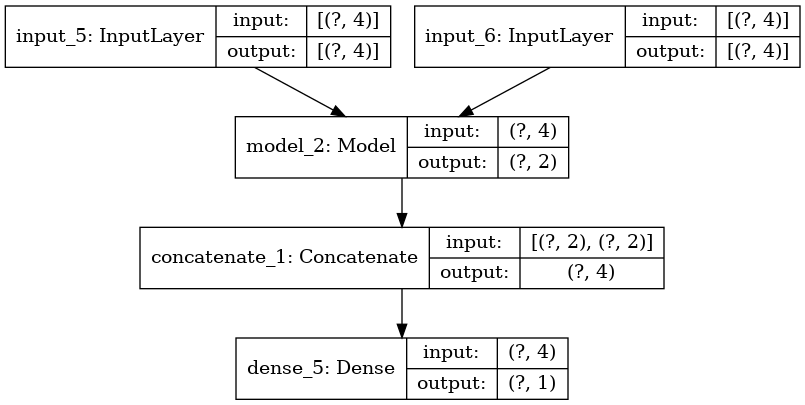

In [8]:
tf.keras.utils.plot_model(model, show_shapes=True)